In [1]:
import pathlib
import os
if not "changed_working_directory" in locals():
    changed_working_directory = True
    os.chdir(pathlib.Path().resolve().parent)
    
%load_ext autoreload
%autoreload 2

In [2]:
from tabGAN import TabGAN
from src import constants as const
import helpers

imports_path = "src//imports.ipynb"
tabGAN_path = "tabGAN.py"
utils_path = "utils\\utils.ipynb"

%run "$imports_path"

In [3]:
if const.dir.project() != os.getcwd():
    raise ValueError("Project directory not the same as in consts")

In [4]:
dataset_train_path = os.path.join(const.dir.data(), "df_adult_edited_train.csv")
dataset_test_path = os.path.join(const.dir.data(), "df_adult_edited_test.csv")

data_train = pd.read_csv(dataset_train_path)
data_test = pd.read_csv(dataset_test_path)
discrete_columns = data_train.columns[data_train.dtypes == "object"]

In [5]:
n_epochs = 100
n_critic = 10
opt_lr = 0.0002
adam_beta1 = 0.5
noise_discrete_unif_max = 0

batch_size = 500

n_synthetic_datasets = 10
n_synthetic_datasets_existing = 0
progress_bar_subsubprocess = True

retrain = False

In [6]:
tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = False,
             noise_discrete_unif_max = noise_discrete_unif_max,
                gumbel_temperature = 0.5)
n_epochs_vec = np.arange(1, 101, 1).tolist()
n_synthetic_datasets_epochs_comparison = 10

2022-03-10 10:08:35.995115: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
utils.hp_tuning.generate_multiple_datasets_for_multiple_epochs_fast(
    tg_qtr,
    dataset_dir = const.dir.hyperparams_tuning(),
    subfolder = "tabGAN-qtr",
    batch_size=batch_size,
    n_synthetic_datasets = n_synthetic_datasets_epochs_comparison,
    n_epochs_vec = n_epochs_vec,
    redo_n_epochs_vec=[],
    restart = False)

In [ ]:
result_n_epochs = utils.hp_tuning.evaluate_n_epochs_through_prediction(
    data_train=data_train,
    data_test=data_test,
    dataset_dir = const.dir.hyperparams_tuning(),
    subfolder="tabGAN-qtr",
    n_epochs_vec = n_epochs_vec,
    n_synthetic_datasets = n_synthetic_datasets_epochs_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_n_epochs.svg",
    legend_pos="lower right"
)

In [ ]:
#result_n_epochs

In [5]:
lr_vec = [1e-1, 5e-2, 1e-2, 5e-3, 2e-3, 1e-3, 5e-4, 2e-4, 1e-4, 5e-5, 1e-5]
n_synthetic_datasets_lr_comparison = 10
n_epochs_lr = 100

def create_tabGAN_for_lr(opt_lr):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = True,
             noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_lr,
    hyperparams_vec=lr_vec,
    n_epochs=n_epochs_lr,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_lr_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "learning_rate",
    add_comparison_folder=True,
    overwrite_dataset=False
)

  0%|          | 0/110 [00:00<?, ?it/s]

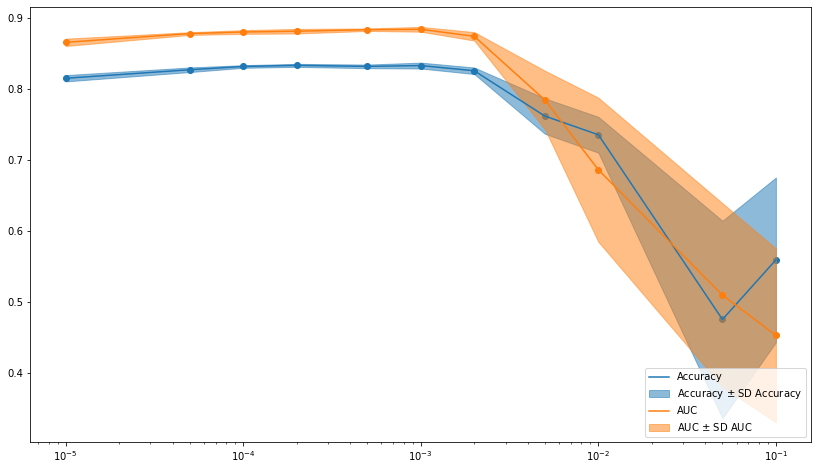

In [12]:
result_lr = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=lr_vec,
    hyperparams_name = "learning_rate",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_lr_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_lr.svg",
    legend_pos="lower right",
    x_scale="log",
    incl_comparison_folder=True
)

In [13]:
result_lr

,n_epochs,Accuracy,AUC,SD Accuracy,SD AUC
0,learning_rate_0.1,0.559329,0.453252,0.115768,0.122132
1,learning_rate_0.05,0.475578,0.509895,0.138740,0.129101
2,learning_rate_0.01,0.735219,0.686055,0.025204,0.101284
3,learning_rate_0.005,0.761448,0.784127,0.024862,0.041137
4,learning_rate_0.002,0.825139,0.873567,0.004577,0.005957
5,learning_rate_0.001,0.832457,0.883441,0.004156,0.003381
6,learning_rate_0.0005,0.831321,0.882893,0.002537,0.001741
7,learning_rate_0.0002,0.832736,0.880764,0.002117,0.003232
8,learning_rate_0.0001,0.831162,0.879639,0.001866,0.002592
9,learning_rate_5e-05,0.826580,0.877448,0.003239,0.001924


In [9]:
adam_beta1_vec = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
n_synthetic_datasets_adam_beta1_comparison = 10
n_epochs_adam_beta1 = 100

def create_tabGAN_for_adam_beta1(adam_beta1):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = True,
             noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_adam_beta1,
    hyperparams_vec=adam_beta1_vec,
    n_epochs=n_epochs_adam_beta1,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_adam_beta1_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "adam_beta1",
    add_comparison_folder=True,
    overwrite_dataset=False
)

  0%|          | 0/110 [00:00<?, ?it/s]

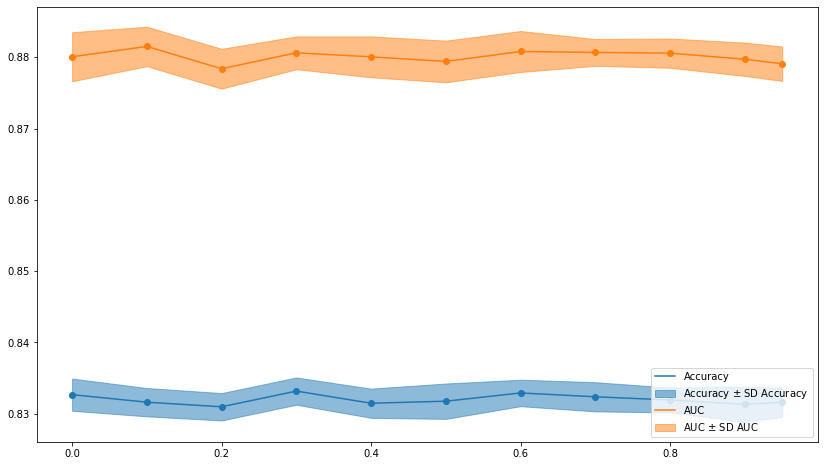

In [11]:
result_adam_beta1 = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=adam_beta1_vec,
    hyperparams_name = "adam_beta1",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_adam_beta1_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_adam_beta1.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=False
)

In [72]:
result_adam_beta1

,n_epochs,Accuracy,AUC,SD Accuracy,SD AUC
0,adam_beta1_0,0.833639,0.881278,0.002455,0.004128
1,adam_beta1_0.1,0.832789,0.882001,0.001124,0.003088
2,adam_beta1_0.2,0.830784,0.879345,0.001672,0.002553
3,adam_beta1_0.3,0.833785,0.880704,0.001461,0.002446
4,adam_beta1_0.4,0.832098,0.879639,0.001296,0.003625
5,adam_beta1_0.5,0.831700,0.879993,0.002079,0.002480
6,adam_beta1_0.6,0.832975,0.882811,0.001500,0.001176
7,adam_beta1_0.7,0.833201,0.880946,0.001941,0.001423
8,adam_beta1_0.8,0.831036,0.880944,0.002132,0.000885
9,adam_beta1_0.9,0.830478,0.878985,0.003406,0.002928


In [12]:
adam_beta2_vec = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 0.999]
n_synthetic_datasets_adam_beta2_comparison = 10
n_epochs_adam_beta2 = 100

def create_tabGAN_for_adam_beta2(adam_beta2):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      adam_beta2=adam_beta2, quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_adam_beta2,
    hyperparams_vec=adam_beta2_vec,
    n_epochs=n_epochs_adam_beta2,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_adam_beta2_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "adam_beta2",
    add_comparison_folder=True,
    overwrite_dataset=False
)

  0%|          | 0/120 [00:00<?, ?it/s]

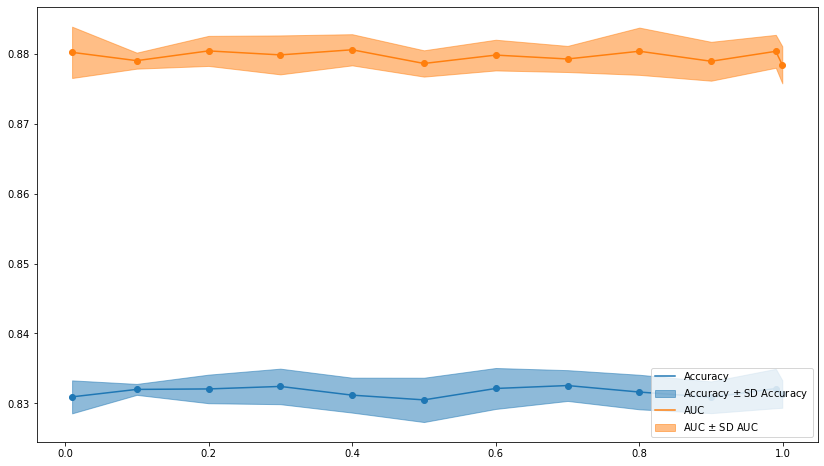

In [13]:
result_adam_beta2 = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=adam_beta2_vec,
    hyperparams_name = "adam_beta2",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_adam_beta2_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_adam_beta2.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=False,
)

In [14]:
result_adam_beta2

,n_epochs,Accuracy,AUC,SD Accuracy,SD AUC
0,adam_beta2_0.01,0.830923,0.880237,0.002359,0.003672
1,adam_beta2_0.1,0.831992,0.879047,0.000783,0.001146
2,adam_beta2_0.2,0.832058,0.880443,0.002044,0.002150
3,adam_beta2_0.3,0.832417,0.879872,0.002542,0.002786
4,adam_beta2_0.4,0.831169,0.880603,0.002499,0.002230
5,adam_beta2_0.5,0.830491,0.878645,0.003171,0.001881
6,adam_beta2_0.6,0.832125,0.879844,0.002930,0.002197
7,adam_beta2_0.7,0.832543,0.879288,0.002204,0.001868
8,adam_beta2_0.8,0.831614,0.880396,0.002472,0.003382
9,adam_beta2_0.9,0.830863,0.878960,0.002269,0.002782


In [8]:
n_critic_vec = np.arange(1,26)
n_synthetic_datasets_n_critic_comparison = 10
n_epochs_n_critic = 100

def create_tabGAN_for_n_critic(n_critic):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_n_critic,
    hyperparams_vec=n_critic_vec,
    n_epochs=n_epochs_n_critic,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_n_critic_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "n_critic",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
    overwrite_dataset=False
)

  0%|          | 0/250 [00:00<?, ?it/s]

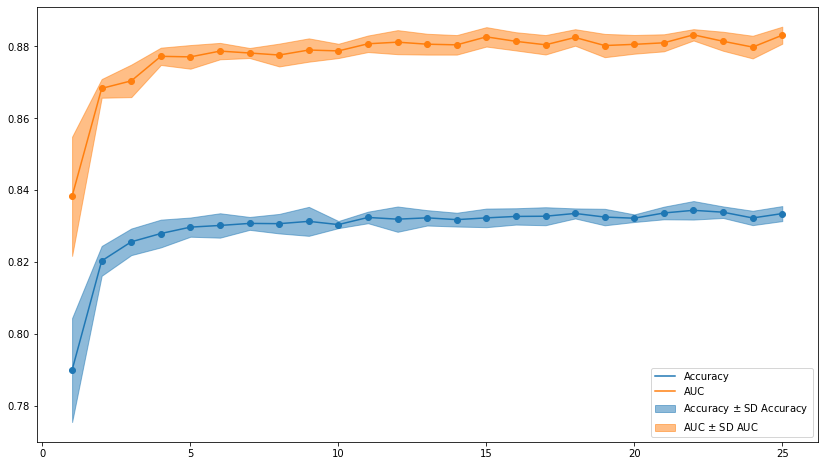

In [20]:
result_n_critic = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=n_critic_vec,
    hyperparams_name = "n_critic",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_n_critic_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_n_critic.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=False
)

In [22]:
#result_n_critic

In [22]:
qtr_spread_vec = np.round(np.linspace(0, 1, 21),2)
n_synthetic_datasets_qtr_spread_comparison = 10
n_epochs_qtr_spread = 100

def create_tabGAN_for_qtr_spread(qtr_spread):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     qtr_spread=qtr_spread)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_qtr_spread,
    hyperparams_vec=qtr_spread_vec,
    n_epochs=n_epochs_qtr_spread,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_qtr_spread_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "qtr_spread",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
    overwrite_dataset=False
)

  0%|          | 0/210 [00:00<?, ?it/s]

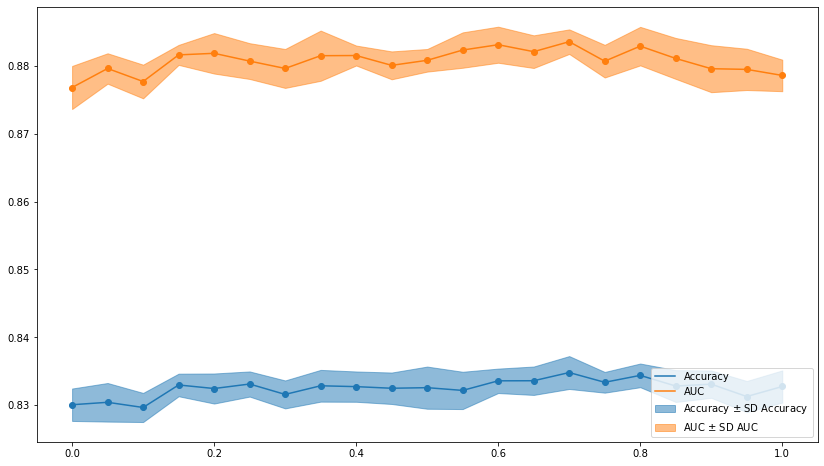

In [23]:
result_qtr_spread = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=qtr_spread_vec,
    hyperparams_name = "qtr_spread",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_qtr_spread_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_qtr_spread.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [73]:
#result_qtr_spread

In [6]:
gumbel_temp_vec = np.round(np.linspace(0.001, 0.009, 9), 4).tolist()
gumbel_temp_vec += np.round(np.linspace(0.01, 0.19, 19), 3).tolist()
gumbel_temp_vec += np.round(np.linspace(0.2, 2, 19),2).tolist()
n_synthetic_datasets_gumbel_temp_comparison = 10
n_epochs_gumbel_temp = 100

def create_tabGAN_for_gumbel_temp(gumbel_temp):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     gumbel_temperature=gumbel_temp)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_gumbel_temp,
    hyperparams_vec=gumbel_temp_vec,
    n_epochs=n_epochs_gumbel_temp,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_gumbel_temp_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "gumbel_temp",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
)

  0%|          | 0/470 [00:00<?, ?it/s]

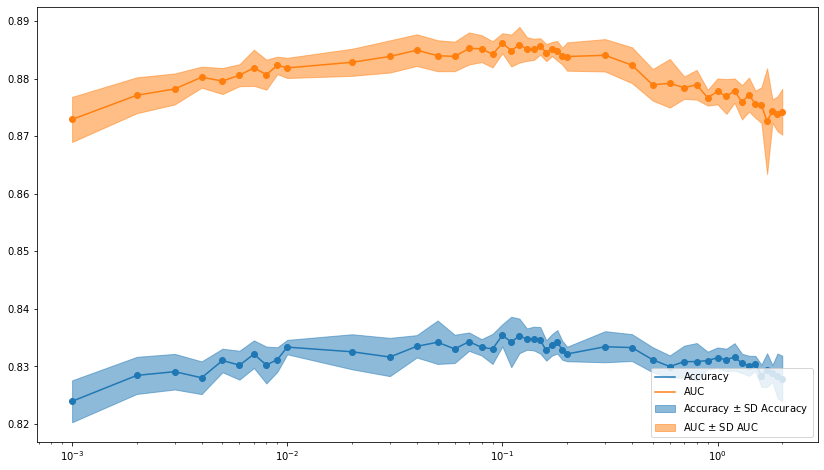

In [7]:
result_gumbel_temp = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=gumbel_temp_vec,
    hyperparams_name = "gumbel_temp",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_gumbel_temp_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_gumbel_temp.svg",
    legend_pos="lower right",
    x_scale="log",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [74]:
#result_gumbel_temp

In [16]:
qtr_lbound_apply_vec = np.round(np.linspace(0.02, 0.2, 10),2).tolist() + np.round(np.linspace(0.002, 0.01, 5),3).tolist()
n_synthetic_datasets_qtr_lbound_apply_comparison = 10
n_epochs_qtr_lbound_apply = 100

def create_tabGAN_for_qtr_lbound_apply(qtr_lbound_apply):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     qtr_lbound_apply=qtr_lbound_apply)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_qtr_lbound_apply,
    hyperparams_vec=qtr_lbound_apply_vec,
    n_epochs=n_epochs_qtr_lbound_apply,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_qtr_lbound_apply_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "qtr_lbound_apply",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
)

  0%|          | 0/150 [00:00<?, ?it/s]

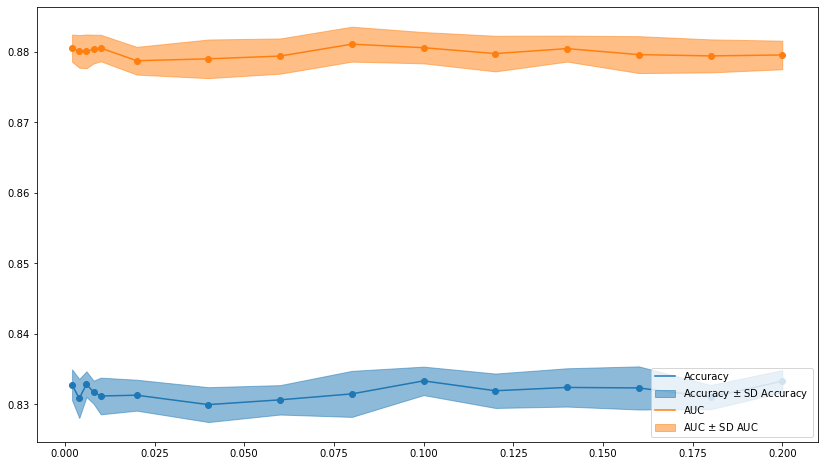

In [22]:
result_qtr_lbound_apply = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=qtr_lbound_apply_vec,
    hyperparams_name = "qtr_lbound_apply",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_qtr_lbound_apply_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_qtr_lbound_apply.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=False
)

In [19]:
result_qtr_lbound_apply

,n_epochs,Accuracy,AUC,SD Accuracy,SD AUC
0,qtr_lbound_apply_0.02,0.831308,0.878738,0.002194,0.001968
1,qtr_lbound_apply_0.04,0.829973,0.879007,0.002470,0.002740
2,qtr_lbound_apply_0.06,0.830651,0.879398,0.002087,0.002500
3,qtr_lbound_apply_0.08,0.831494,0.881086,0.003265,0.002478
4,qtr_lbound_apply_0.1,0.833340,0.880582,0.002019,0.002217
5,qtr_lbound_apply_0.12,0.831939,0.879752,0.002440,0.002528
6,qtr_lbound_apply_0.14,0.832410,0.880455,0.002717,0.001844
7,qtr_lbound_apply_0.16,0.832337,0.879604,0.003058,0.002616
8,qtr_lbound_apply_0.18,0.831042,0.879423,0.001716,0.002343
9,qtr_lbound_apply_0.2,0.833293,0.879553,0.001578,0.002025


In [20]:
dim_hidden_vec = [16, 32, 64, 96, 128, 192, 256, 384, 512, 786, 1024]
n_synthetic_datasets_dim_hidden_comparison = 10
n_epochs_dim_hidden = 100

def create_tabGAN_for_dim_hidden(dim_hidden):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     dim_hidden=dim_hidden)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_dim_hidden,
    hyperparams_vec=dim_hidden_vec,
    n_epochs=n_epochs_dim_hidden,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_dim_hidden_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "dim_hidden",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
)

  0%|          | 0/110 [00:00<?, ?it/s]

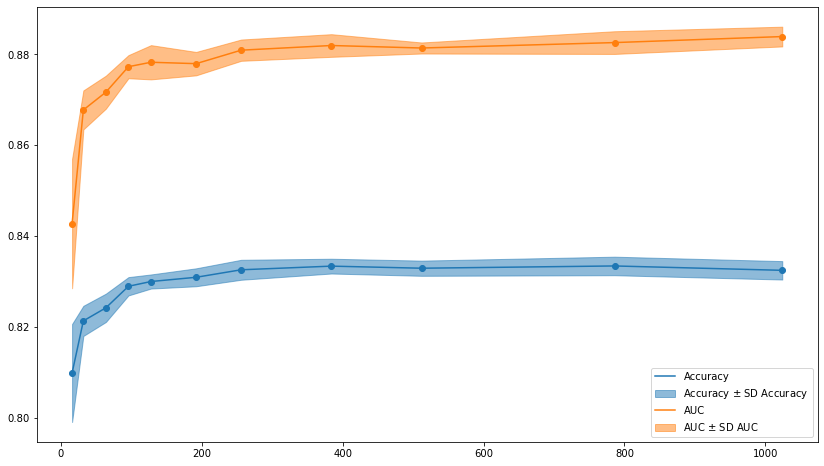

In [21]:
result_dim_hidden = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=dim_hidden_vec,
    hyperparams_name = "dim_hidden",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_dim_hidden_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_dim_hidden.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [23]:
result_dim_hidden

,n_epochs,Accuracy,AUC,SD Accuracy,SD AUC
0,dim_hidden_16,0.809841,0.842751,0.010797,0.014245
1,dim_hidden_32,0.821315,0.867768,0.003319,0.004293
2,dim_hidden_64,0.824197,0.871687,0.003120,0.003631
3,dim_hidden_96,0.828938,0.877291,0.002017,0.002547
4,dim_hidden_128,0.829987,0.878267,0.001554,0.003771
5,dim_hidden_192,0.830916,0.877959,0.001975,0.002579
6,dim_hidden_256,0.832570,0.880928,0.002199,0.002342
7,dim_hidden_384,0.833373,0.881955,0.001628,0.002494
8,dim_hidden_512,0.832915,0.881405,0.001675,0.001216
9,dim_hidden_786,0.833413,0.882599,0.002041,0.002499


In [114]:
dim_latent_vec = [16, 32, 64, 96, 128, 192, 256, 384, 512, 786, 1024]
n_synthetic_datasets_dim_latent_comparison = 10
n_epochs_dim_latent = 100

def create_tabGAN_for_dim_latent(dim_latent):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     dim_latent=dim_latent)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_dim_latent,
    hyperparams_vec=dim_latent_vec,
    n_epochs=n_epochs_dim_latent,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_dim_latent_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "dim_latent",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

  0%|          | 0/110 [00:00<?, ?it/s]

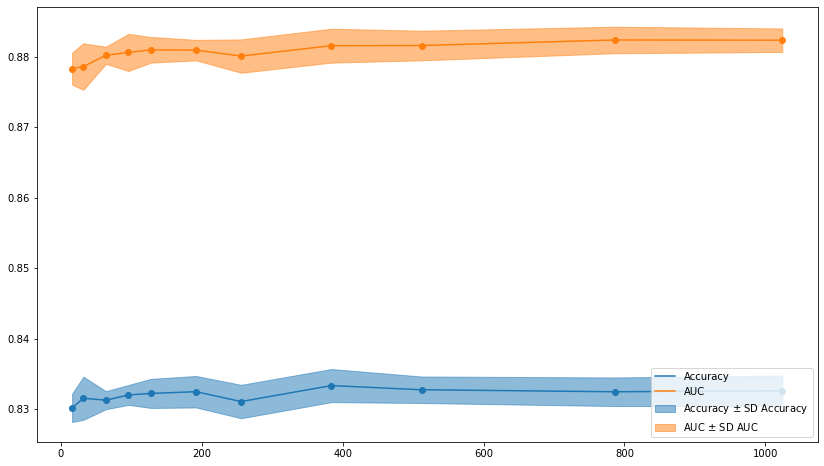

In [125]:
result_dim_latent = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=dim_latent_vec,
    hyperparams_name = "dim_latent",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_dim_latent_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_dim_latent.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [ ]:
result_dim_latent

In [134]:
wgan_lambda_vec = np.arange(0,11, 1).tolist() + np.arange(12,21,2).tolist()
n_synthetic_datasets_wgan_lambda_comparison = 10
n_epochs_wgan_lambda = 100

def create_tabGAN_for_wgan_lambda(wgan_lambda):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     wgan_lambda=wgan_lambda)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_wgan_lambda,
    hyperparams_vec=wgan_lambda_vec,
    n_epochs=n_epochs_wgan_lambda,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_wgan_lambda_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "wgan_lambda",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

  0%|          | 0/160 [00:00<?, ?it/s]

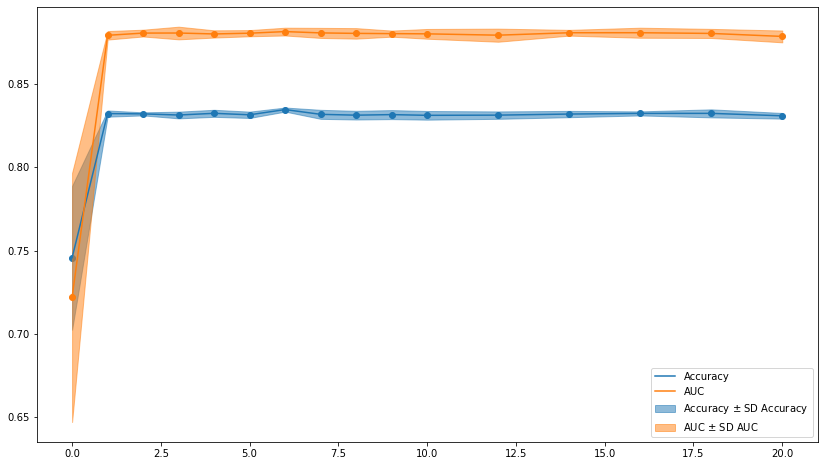

In [135]:
result_wgan_lambda = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=wgan_lambda_vec,
    hyperparams_name = "wgan_lambda",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_wgan_lambda_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_wgan_lambda.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [ ]:
result_wgan_lambda

In [127]:
n_quantiles_int_vec = [10, 50, 100, 250, 500, 750, 1000, 2500, 5000, 10000]
n_synthetic_datasets_n_quantiles_int_comparison = 10
n_epochs_n_quantiles_int = 100

def create_tabGAN_for_n_quantiles_int(n_quantiles_int):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     n_quantiles_int=n_quantiles_int)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_n_quantiles_int,
    hyperparams_vec=n_quantiles_int_vec,
    n_epochs=n_epochs_n_quantiles_int,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_n_quantiles_int_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "n_quantiles_int",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

  0%|          | 0/100 [00:00<?, ?it/s]

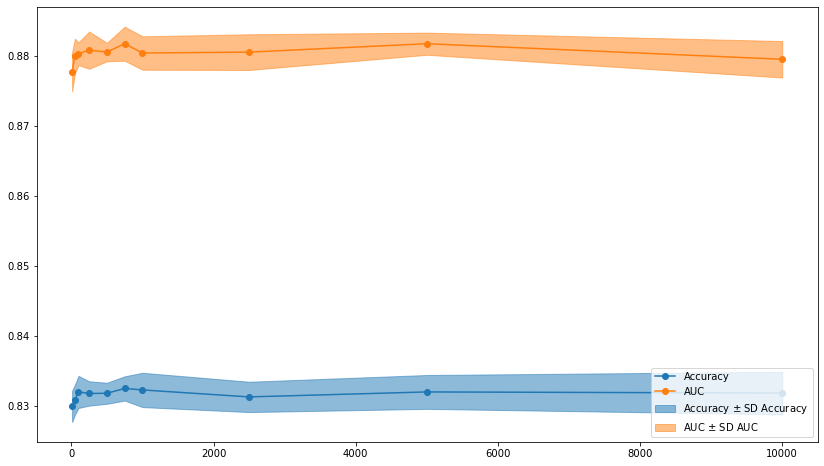

In [155]:
result_n_quantiles_int = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=n_quantiles_int_vec,
    hyperparams_name = "n_quantiles_int",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_n_quantiles_int_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_n_quantiles_int.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [156]:
result_n_quantiles_int

,Hyperparameters,Accuracy,AUC,SD Accuracy,SD AUC
0,n_quantiles_int_10,0.829947,0.877735,0.002236,0.002787
1,n_quantiles_int_50,0.830903,0.880001,0.002145,0.002495
2,n_quantiles_int_100,0.832012,0.880346,0.002294,0.001619
3,n_quantiles_int_250,0.831793,0.880850,0.001739,0.002662
4,n_quantiles_int_500,0.831819,0.880581,0.001504,0.001318
5,n_quantiles_int_750,0.832510,0.881768,0.001734,0.002435
6,n_quantiles_int_1000,0.832297,0.880441,0.002453,0.002387
7,n_quantiles_int_2500,0.831301,0.880570,0.002167,0.002551
8,n_quantiles_int_5000,0.832012,0.881770,0.002419,0.001583
9,n_quantiles_int_10000,0.831853,0.879547,0.003042,0.002606


In [7]:
n_hidden_layers_vec = [1,2,3,4,5]
n_synthetic_datasets_n_hidden_layers_comparison = 10
n_epochs_n_hidden_layers = 100

def create_tabGAN_for_n_hidden_layers(n_hidden_layers):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     n_hidden_layers=n_hidden_layers)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_n_hidden_layers,
    hyperparams_vec=n_hidden_layers_vec,
    n_epochs=n_epochs_n_hidden_layers,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_n_hidden_layers_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "n_hidden_layers",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

Hyperparameters subfolder creation:   0%|          | 0/5 [00:00<?, ?it/s]

Generated datasets:   0%|          | 0/10 [00:00<?, ?it/s]

Generated datasets:   0%|          | 0/10 [00:00<?, ?it/s]

Generated datasets:   0%|          | 0/10 [00:00<?, ?it/s]

Progress generating dataset 4:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 5:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

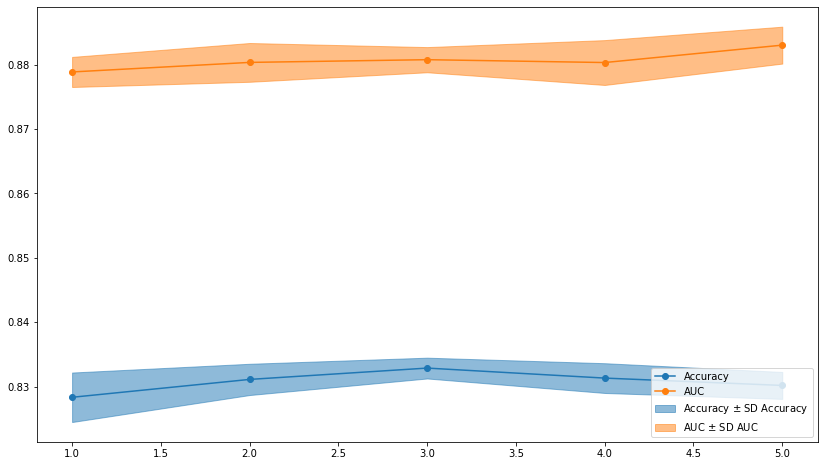

In [32]:
result_n_hidden_layers = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=n_hidden_layers_vec,
    hyperparams_name = "n_hidden_layers",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_n_hidden_layers_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_n_hidden_layers.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [33]:
result_n_hidden_layers

,Hyperparameters,Accuracy,AUC,SD Accuracy,SD AUC
0,n_hidden_layers_1,0.828333,0.878858,0.003844,0.002336
1,n_hidden_layers_2,0.831109,0.880341,0.002427,0.003012
2,n_hidden_layers_3,0.832869,0.880763,0.001615,0.001954
3,n_hidden_layers_4,0.831315,0.880320,0.002311,0.003483
4,n_hidden_layers_5,0.830173,0.883022,0.002091,0.002865


In [83]:
batch_size_vec = [50, 100, 250, 500, 750, 1000, 2500, 5000]
n_synthetic_datasets_batch_size_comparison = 10
n_epochs_batch_size = 100

def create_tabGAN_for_batch_size(batch_size):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     batch_size=batch_size)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_batch_size,
    hyperparams_vec=batch_size_vec,
    n_epochs=n_epochs_batch_size,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=None,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_batch_size_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "batch_size",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

  0%|          | 0/80 [00:00<?, ?it/s]

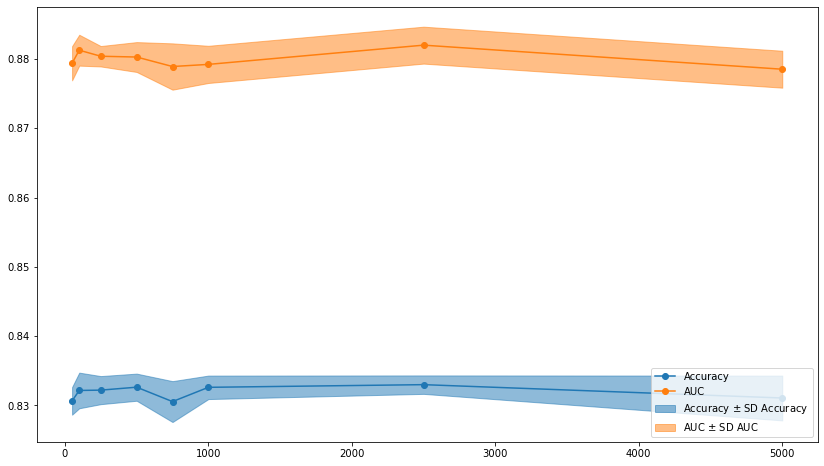

In [84]:
result_batch_size = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=batch_size_vec,
    hyperparams_name = "batch_size",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_batch_size_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_batch_size.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [73]:
result_batch_size

,Hyperparameters,Accuracy,AUC,SD Accuracy,SD AUC
0,batch_size_50,0.830651,0.879375,0.001990,0.002466
1,batch_size_100,0.832158,0.881258,0.002571,0.002228
2,batch_size_250,0.832205,0.880385,0.002026,0.001474
3,batch_size_500,0.832629,0.880273,0.001958,0.002155
4,batch_size_750,0.830551,0.878902,0.002951,0.003343
5,batch_size_1000,0.832610,0.879210,0.001694,0.002683
6,batch_size_2500,0.832995,0.881987,0.001332,0.002664
7,batch_size_5000,0.831069,0.878514,0.003233,0.002665


In [18]:
batch_size_300_epochs_vec = [50, 100, 250, 500, 750, 1000, 2500, 5000]
n_synthetic_datasets_batch_size_300_epochs_comparison = 10
n_epochs_batch_size_300_epochs = 300

def create_tabGAN_for_batch_size_300_epochs(batch_size_300_epochs):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     batch_size=batch_size_300_epochs)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_batch_size_300_epochs,
    hyperparams_vec=batch_size_300_epochs_vec,
    n_epochs=n_epochs_batch_size_300_epochs,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=None,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_batch_size_300_epochs_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "batch_size_300_epochs",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

  0%|          | 0/80 [00:00<?, ?it/s]

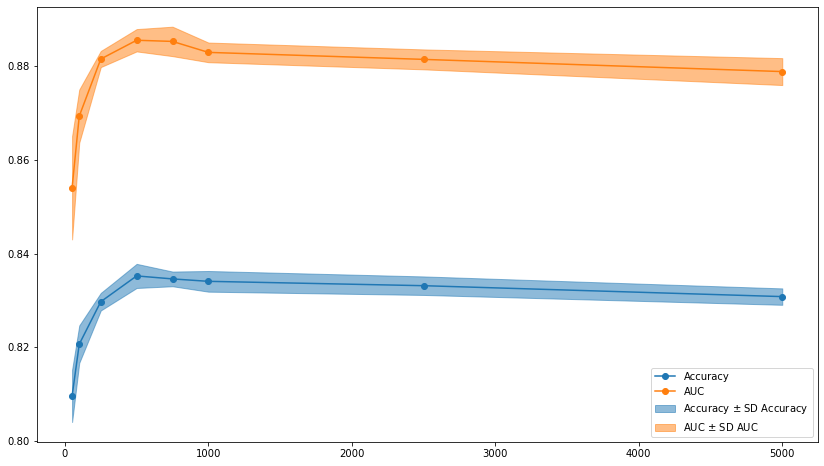

In [33]:
result_batch_size_300_epochs = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=batch_size_300_epochs_vec,
    hyperparams_name = "batch_size_300_epochs",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_batch_size_300_epochs_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_batch_size_300_epochs.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [34]:
result_batch_size_300_epochs

,Hyperparameters,Accuracy,AUC,SD Accuracy,SD AUC
0,batch_size_300_epochs_50,0.809582,0.854027,0.005570,0.011016
1,batch_size_300_epochs_100,0.820644,0.869345,0.003997,0.005666
2,batch_size_300_epochs_250,0.829708,0.881534,0.001874,0.001723
3,batch_size_300_epochs_500,0.835212,0.885538,0.002576,0.002384
4,batch_size_300_epochs_750,0.834575,0.885291,0.001570,0.003145
5,batch_size_300_epochs_1000,0.834057,0.882949,0.002208,0.002097
6,batch_size_300_epochs_2500,0.833127,0.881454,0.001977,0.002128
7,batch_size_300_epochs_5000,0.830797,0.878849,0.001753,0.002872


In [15]:
noise_discrete_unif_max_vec = np.round(np.arange(0, 0.41, 0.01), 3).tolist() + [0.005]
n_synthetic_datasets_noise_discrete_unif_max_comparison = 10
n_epochs_noise_discrete_unif_max = 100

def create_tabGAN_for_noise_discrete_unif_max(noise_discrete_unif_max):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_noise_discrete_unif_max,
    hyperparams_vec=noise_discrete_unif_max_vec,
    n_epochs=n_epochs_noise_discrete_unif_max,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_noise_discrete_unif_max_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "noise_discrete_unif_max",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

  0%|          | 0/420 [00:00<?, ?it/s]

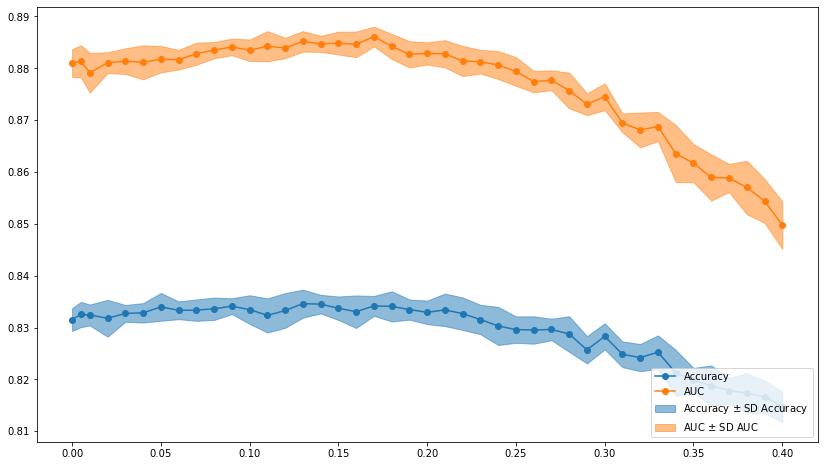

In [16]:
result_noise_discrete_unif_max = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=noise_discrete_unif_max_vec,
    hyperparams_name = "noise_discrete_unif_max",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_noise_discrete_unif_max_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_noise_discrete_unif_max.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [17]:
result_noise_discrete_unif_max

,Hyperparameters,Accuracy,AUC,SD Accuracy,SD AUC
0,noise_discrete_unif_max_0.0,0.831541,0.881006,0.002210,0.002679
1,noise_discrete_unif_max_0.005,0.832510,0.881329,0.002429,0.003116
2,noise_discrete_unif_max_0.01,0.832410,0.879142,0.002020,0.003825
3,noise_discrete_unif_max_0.02,0.831786,0.881082,0.003554,0.001996
4,noise_discrete_unif_max_0.03,0.832722,0.881374,0.001627,0.002484
5,noise_discrete_unif_max_0.04,0.832829,0.881153,0.001878,0.003269
6,noise_discrete_unif_max_0.05,0.833977,0.881751,0.002682,0.002539
7,noise_discrete_unif_max_0.06,0.833320,0.881659,0.001715,0.001899
8,noise_discrete_unif_max_0.07,0.833353,0.882804,0.002066,0.002121
9,noise_discrete_unif_max_0.08,0.833612,0.883500,0.002155,0.001562


In [22]:
adam_beta1_vec_partial = [0, 0.1, 0.3, 0.5, 0.7, 0.9]
adam_beta2_vec_partial = [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 0.999]
amsgrad_vec_partial = [False, True]
adam_betas_vec = [(beta1, beta2, amsgrad) for beta1 in adam_beta1_vec_partial for beta2 in adam_beta2_vec_partial
                  for amsgrad in amsgrad_vec_partial]
n_synthetic_datasets_adam_betas_comparison = 10
n_epochs_adam_betas = 100

def create_tabGAN_for_adam_betas(adam_beta1, adam_beta2, adam_amsgrad):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1, adam_amsgrad=adam_amsgrad,
                      adam_beta2=adam_beta2, quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr
small_adam_betas_vec = (0.5, 0.5, True), (0.5, 0.7, False), (0.5, 0.7, True), (0.5, 0.9, False)

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_adam_betas,
    hyperparams_vec=adam_betas_vec,
    n_epochs=n_epochs_adam_betas,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_adam_betas_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "adam",
    hyperparams_subname = ["beta1", "beta2", "amsgrad"],
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

  0%|          | 0/840 [00:00<?, ?it/s]

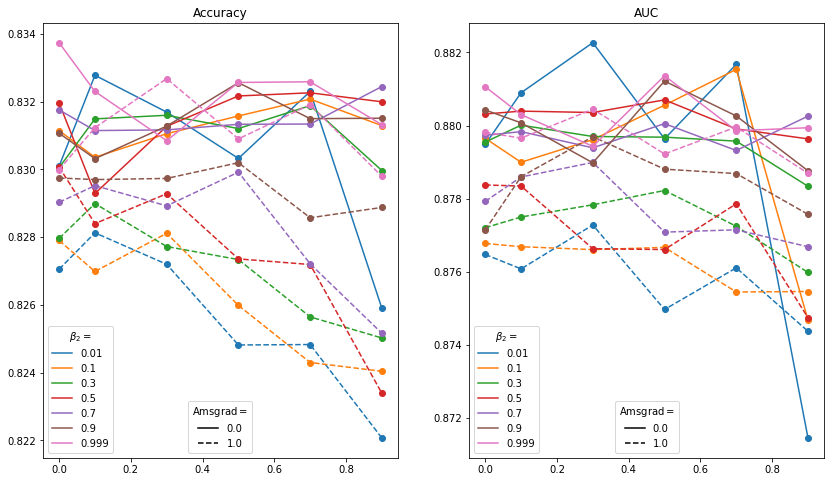

In [24]:
result_adam_betas = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec= adam_betas_vec,
    hyperparams_name = "adam",
    hyperparams_subname = ["beta1", "beta2", "amsgrad"],
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_adam_betas_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_adam_betas.svg",
    legend_pos=["lower left", "lower center"],
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True,
    legend_title= [r"$\beta_2=$", r"Amsgrad$=$"],
    separate_legends=True
)

In [350]:
result_adam_betas

,Hyperparameters,Accuracy,AUC,SD Accuracy,SD AUC
0,adam_beta1_0_beta2_0.01_amsgrad_False,0.830093,0.879484,0.002485,0.003470
1,adam_beta1_0_beta2_0.01_amsgrad_True,0.827052,0.876474,0.002413,0.002283
2,adam_beta1_0_beta2_0.1_amsgrad_False,0.831149,0.879652,0.002262,0.003456
3,adam_beta1_0_beta2_0.3_amsgrad_False,0.830053,0.879548,0.002680,0.002575
4,adam_beta1_0_beta2_0.5_amsgrad_False,0.831965,0.880317,0.002794,0.002532
...,...,...,...,...,...
60,adam_beta1_0.9_beta2_0.5_amsgrad_True,0.823386,0.874744,0.003538,0.003868
61,adam_beta1_0.9_beta2_0.7_amsgrad_False,0.832450,0.880258,0.001671,0.002018
62,adam_beta1_0.9_beta2_0.9_amsgrad_False,0.831514,0.878763,0.002626,0.002693
63,adam_beta1_0.9_beta2_0.999_amsgrad_False,0.831321,0.879941,0.001835,0.002706


In [164]:
sgd_momentum_vec_partial = np.round(np.linspace(0, 0.9, 10), 2).tolist() + [0.95, 0.99]
sgd_nesterov_vec_partial = [False, True]
sgd_vec = [(sgd_momentum, sgd_nesterov) for sgd_momentum in sgd_momentum_vec_partial for sgd_nesterov in sgd_nesterov_vec_partial]
n_synthetic_datasets_sgd_comparison = 10
n_epochs_sgd = 100

def create_tabGAN_for_sgd(sgd_momentum, sgd_nesterov):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, optimizer="sgd", opt_lr = opt_lr, sgd_momentum=sgd_momentum,
                      sgd_nesterov=sgd_nesterov, quantile_transformation_int = True,
                      quantile_rand_transformation = True, noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_sgd,
    hyperparams_vec=sgd_vec,
    n_epochs=n_epochs_sgd,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_sgd_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "sgd",
    hyperparams_subname = ["momentum", "nesterov"],
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

  0%|          | 0/240 [00:00<?, ?it/s]

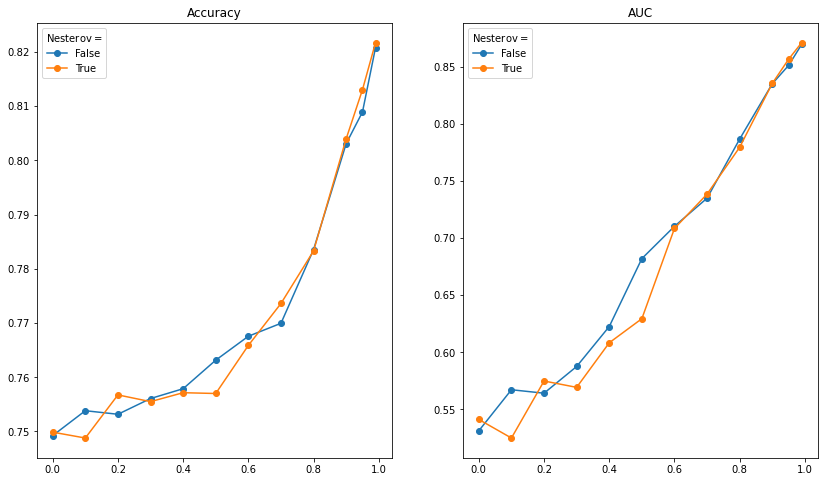

In [176]:
result_sgd = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=sgd_vec,
    hyperparams_name = "sgd",
    hyperparams_subname = ["momentum", "nesterov"],
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_sgd_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_sgd.svg",
    legend_pos="best",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True,
    legend_title= r"Nesterov$=$"
)

In [175]:
result_sgd

,Hyperparameters,Accuracy,AUC,SD Accuracy,SD AUC
0,sgd_momentum_0.0_nesterov_False,0.749236,0.531203,0.006492,0.061608
1,sgd_momentum_0.0_nesterov_True,0.749867,0.541107,0.004059,0.063515
2,sgd_momentum_0.1_nesterov_False,0.753825,0.567152,0.007042,0.060533
3,sgd_momentum_0.1_nesterov_True,0.748785,0.524835,0.003515,0.066110
4,sgd_momentum_0.2_nesterov_False,0.753167,0.564114,0.006158,0.064437
5,sgd_momentum_0.2_nesterov_True,0.756740,0.574804,0.005475,0.041327
6,sgd_momentum_0.3_nesterov_False,0.756069,0.587535,0.002356,0.045462
7,sgd_momentum_0.3_nesterov_True,0.755498,0.569240,0.005080,0.045044
8,sgd_momentum_0.4_nesterov_False,0.757882,0.622541,0.003153,0.030449
9,sgd_momentum_0.4_nesterov_True,0.757145,0.608299,0.006108,0.092067


In [65]:
rmsprop_rho_vec_partial = [0, 0.1, 0.3, 0.5, 0.7, 0.9, 0.99]
rmsprop_momentum_vec_partial = [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 0.999]
rmsprop_centered_vec_partial = [False, True]
rmsprop_vec = [(rho, momentum, centered) for rho in rmsprop_rho_vec_partial for momentum in rmsprop_momentum_vec_partial
                  for centered in rmsprop_centered_vec_partial]
n_synthetic_datasets_rmsprop_comparison = 10
n_epochs_rmsprop = 100

def create_tabGAN_for_rmsprop(rmsprop_rho, rmsprop_momentum, rmsprop_centered):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, rmsprop_rho = rmsprop_rho, rmsprop_centered=rmsprop_centered,
                      rmsprop_momentum=rmsprop_momentum, quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_rmsprop,
    hyperparams_vec=rmsprop_vec,
    n_epochs=n_epochs_rmsprop,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_rmsprop_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "rmsprop",
    hyperparams_subname = ["rho", "momentum", "centered"],
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

  0%|          | 0/980 [00:00<?, ?it/s]

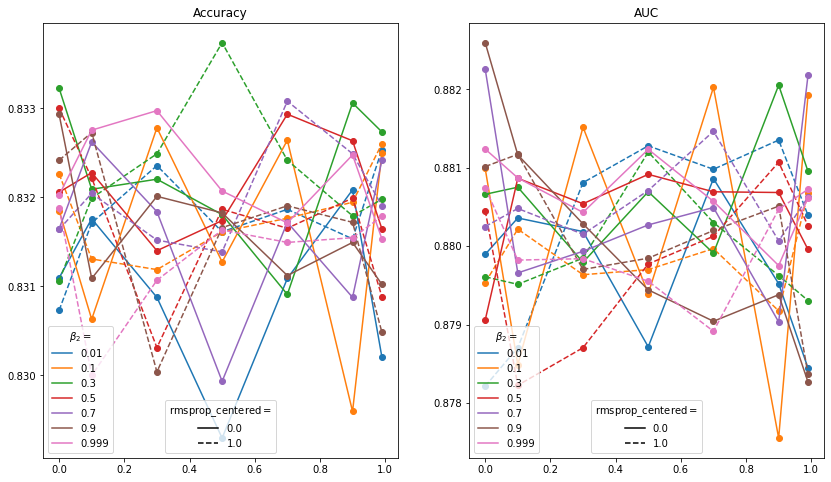

In [66]:
result_rmsprop = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec= rmsprop_vec,
    hyperparams_name = "rmsprop",
    hyperparams_subname = ["rho", "momentum", "centered"],
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_rmsprop_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_rmsprop.svg",
    legend_pos=["lower left", "lower center"],
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True,
    legend_title= [r"$\beta_2=$", r"rmsprop_centered$=$"],
    separate_legends=True
)

In [67]:
result_rmsprop.sort_values("Accuracy")

,Hyperparameters,Accuracy,AUC,SD Accuracy,SD AUC
42,rmsprop_rho_0.5_momentum_0.01_centered_False,0.829296,0.878718,0.003149,0.002395
72,rmsprop_rho_0.9_momentum_0.1_centered_False,0.829595,0.877556,0.003326,0.002983
50,rmsprop_rho_0.5_momentum_0.7_centered_False,0.829934,0.880271,0.003442,0.003237
27,rmsprop_rho_0.1_momentum_0.999_centered_True,0.830000,0.879823,0.002841,0.003874
39,rmsprop_rho_0.3_momentum_0.9_centered_True,0.830040,0.879704,0.002188,0.001715
...,...,...,...,...,...
7,rmsprop_rho_0_momentum_0.5_centered_True,0.833001,0.880453,0.002901,0.003143
74,rmsprop_rho_0.9_momentum_0.3_centered_False,0.833061,0.882052,0.002099,0.002299
65,rmsprop_rho_0.7_momentum_0.7_centered_True,0.833081,0.881464,0.003148,0.003078
4,rmsprop_rho_0_momentum_0.3_centered_False,0.833227,0.880661,0.002753,0.002591


In [35]:
gan_architecture_dim_hidden_vec_partial = [16, 32, 64, 96, 128, 192, 256, 384, 512, 768, 1024]
gan_architecture_dim_latent_vec_partial = [16, 32, 64, 96, 128, 192, 256, 384, 512, 768, 1024]
gan_architecture_n_hidden_layers = [2]
gan_architecture_vec = [(dim_hidden, dim_latent, n_hidden_layers)
                        for dim_hidden in gan_architecture_dim_hidden_vec_partial
                        for dim_latent in gan_architecture_dim_latent_vec_partial
                        for n_hidden_layers in gan_architecture_n_hidden_layers]
n_synthetic_datasets_gan_architecture_comparison = 10
n_epochs_gan_architecture = 100

def create_tabGAN_for_gan_architecture(dim_hidden, dim_latent, n_hidden_layers):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, optimizer="adam", opt_lr = opt_lr,
                    dim_hidden=dim_hidden, dim_latent=dim_latent, n_hidden_layers = n_hidden_layers,
                    quantile_transformation_int = True, quantile_rand_transformation = True,
                    noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_gan_architecture,
    hyperparams_vec=gan_architecture_vec,
    n_epochs=n_epochs_gan_architecture,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_gan_architecture_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "gan_architecture",
    hyperparams_subname = ["dim_hidden", "dim_latent", "n_hidden_layers"],
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

  0%|          | 0/1210 [00:00<?, ?it/s]

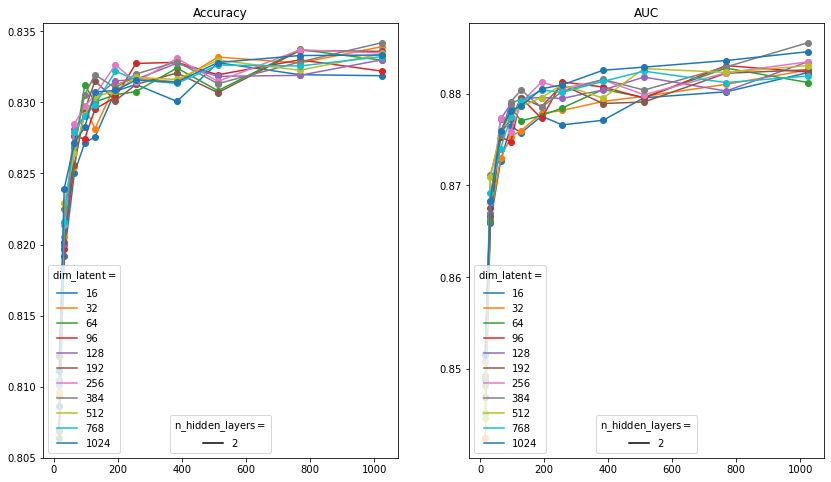

In [36]:
result_gan_architecture = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=gan_architecture_vec,
    hyperparams_name = "gan_architecture",
    hyperparams_subname = ["dim_hidden", "dim_latent", "n_hidden_layers"],
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_gan_architecture_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_gan_architecture.svg",
    legend_pos=["lower left", "lower center"],
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True,
    legend_title= [r"dim_latent$=$", r"n_hidden_layers$=$"],
    separate_legends=True
)

In [37]:
result_gan_architecture

,Hyperparameters,Accuracy,AUC,SD Accuracy,SD AUC
0,gan_architecture_dim_hidden_16_dim_latent_16_n...,0.808632,0.848776,0.004959,0.010168
1,gan_architecture_dim_hidden_16_dim_latent_32_n...,0.809369,0.842491,0.006207,0.009943
2,gan_architecture_dim_hidden_16_dim_latent_64_n...,0.806388,0.845175,0.008838,0.011829
3,gan_architecture_dim_hidden_16_dim_latent_96_n...,0.812171,0.851599,0.008107,0.009095
4,gan_architecture_dim_hidden_16_dim_latent_128_...,0.810498,0.849298,0.008651,0.015974
...,...,...,...,...,...
116,gan_architecture_dim_hidden_1024_dim_latent_25...,0.833473,0.883468,0.002011,0.003109
117,gan_architecture_dim_hidden_1024_dim_latent_38...,0.834203,0.885551,0.001840,0.002090
118,gan_architecture_dim_hidden_1024_dim_latent_51...,0.833420,0.883056,0.003222,0.001539
119,gan_architecture_dim_hidden_1024_dim_latent_76...,0.833220,0.881923,0.002613,0.002845


In [106]:
noise_discrete_unif_max_vec_partial = np.arange(0, 0.21, 0.01).tolist() + [0.001, 0.003, 0.005, 0.007, 0.015, 0.025]
gumbel_temp_vec_partial = [0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 1]
noise_and_gumbel_temp_vec = [(noise_discrete_unif_max, gumbel_temp)
                        for noise_discrete_unif_max in noise_discrete_unif_max_vec_partial
                        for gumbel_temp in gumbel_temp_vec_partial]
n_synthetic_datasets_noise_and_gumbel_temp_comparison = 10
n_epochs_noise_and_gumbel_temp = 100

def create_tabGAN_for_noise_and_gumbel_temp(noise_discrete_unif_max, gumbel_temp):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, optimizer="adam", opt_lr = opt_lr,
                    quantile_transformation_int = True, quantile_rand_transformation = True,
                    noise_discrete_unif_max = noise_discrete_unif_max,
                   gumbel_temperature=gumbel_temp)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_noise_and_gumbel_temp,
    hyperparams_vec=noise_and_gumbel_temp_vec,
    n_epochs=n_epochs_noise_and_gumbel_temp,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_noise_and_gumbel_temp_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "oh_encoding_choices",
    hyperparams_subname = ["noise_discrete_unif_max", "gumbel_temp"],
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
    progress_bar_subsubprocess=progress_bar_subsubprocess
)

  0%|          | 0/1890 [00:00<?, ?it/s]

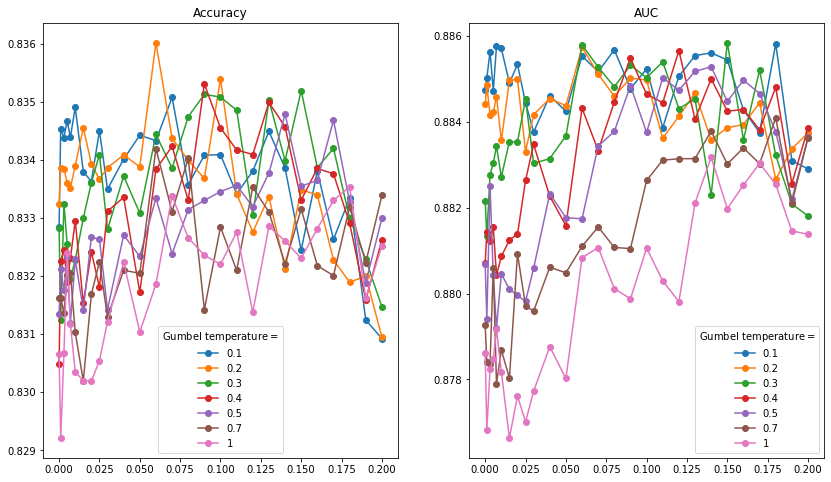

In [119]:
result_noise_and_gumbel_temp = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=noise_and_gumbel_temp_vec,
    hyperparams_name = "oh_encoding_choices",
    hyperparams_subname = ["noise_discrete_unif_max", "gumbel_temp"],
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_noise_and_gumbel_temp_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_noise_and_gumbel_temp.svg",
    legend_pos="best",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True,
    legend_title= r"Gumbel temperature$=$",
    only_separate_by_color=True,
    drop_na=False,
    report_na=False,
    result_table_split_hps=True
)

In [120]:
result_noise_and_gumbel_temp.sort_values("AUC", ascending=False)

,noise_discrete_unif_max,gumbel_temp,Accuracy,AUC,SD Accuracy,SD AUC
149,0.150,0.3,0.835193,0.885845,0.002878,0.001538
168,0.180,0.1,0.833340,0.885822,0.002174,0.001533
86,0.060,0.3,0.834436,0.885794,0.002873,0.003177
28,0.007,0.1,0.834389,0.885761,0.002000,0.001931
85,0.060,0.2,0.836016,0.885739,0.002061,0.001130
...,...,...,...,...,...,...
69,0.030,1.0,0.831215,0.877726,0.002976,0.002504
55,0.020,1.0,0.830186,0.877613,0.003441,0.004131
62,0.025,1.0,0.830544,0.877008,0.001422,0.002686
13,0.001,1.0,0.829210,0.876815,0.002438,0.001815


In [50]:
leaky_relu_alpha_vec = np.round(np.arange(0, 1.01, 0.05),2).tolist()
n_synthetic_datasets_leaky_relu_alpha_comparison = 10
n_epochs_leaky_relu_alpha = 10

def create_tabGAN_for_leaky_relu_alpha(leaky_relu_alpha):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                    #leaky_relu_alpha=leaky_relu_alpha,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                   )
    return tg_qtr

In [82]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_leaky_relu_alpha,
    hyperparams_vec=leaky_relu_alpha_vec,
    n_epochs=n_epochs_leaky_relu_alpha,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_leaky_relu_alpha_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "leaky_relu_alpha",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
    progress_bar_subsubprocess=progress_bar_subsubprocess
)

Hyperparameters subfolder creation:   0%|          | 0/21 [00:00<?, ?it/s]

Generated datasets:   0%|          | 0/10 [00:00<?, ?it/s]

Generated datasets:   0%|          | 0/10 [00:00<?, ?it/s]

Progress generating dataset 4:   0%|          | 0/10 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [20]:
result_leaky_relu_alpha = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=leaky_relu_alpha_vec,
    hyperparams_name = "leaky_relu_alpha",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_leaky_relu_alpha_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_leaky_relu_alpha.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True,
    print_csv_file_paths=True
)

  0%|          | 0/210 [00:00<?, ?it/s]

/work/arneir/Master-thesis-storage/hyperparams_tuning/tabGAN-qtr/leaky_relu_alpha_comparison/leaky_relu_alpha_0.0/gen0.csv


ValueError: y contains previously unseen labels: '>50K'

In [27]:
pd.read_csv("/work/arneir/Master-thesis-storage/hyperparams_tuning/tabGAN-qtr/leaky_relu_alpha_comparison/leaky_relu_alpha_0.3/gen2.csv")

,Unnamed: 0,age,workclass,fnlwgt,education,educational.num,marital.status,occupation,race,gender,capital.gain,capital.loss,hours.per.week,native.country,income
0,0,90.0,Self-emp-not-inc,1484705.0,HS-grad,16.0,Divorced,Farming-fishing,White,Male,99999.0,4356.0,99.0,US,<=50K
1,1,90.0,Self-emp-not-inc,1484705.0,HS-grad,1.0,Divorced,Farming-fishing,White,Male,99999.0,4356.0,99.0,US,<=50K
2,2,90.0,Self-emp-not-inc,1484705.0,HS-grad,16.0,Divorced,Farming-fishing,White,Male,99999.0,4356.0,99.0,US,<=50K
3,3,90.0,Self-emp-not-inc,1484705.0,HS-grad,16.0,Divorced,Farming-fishing,White,Male,99999.0,4356.0,99.0,US,<=50K
4,4,90.0,Self-emp-not-inc,1484705.0,HS-grad,13.0,Divorced,Farming-fishing,White,Male,99999.0,4356.0,99.0,US,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,30157,90.0,Self-emp-not-inc,1484705.0,HS-grad,9.0,Divorced,Farming-fishing,White,Male,99999.0,4356.0,99.0,US,<=50K
30158,30158,90.0,Self-emp-not-inc,1484705.0,HS-grad,16.0,Divorced,Farming-fishing,White,Male,99999.0,4356.0,99.0,US,<=50K
30159,30159,90.0,Self-emp-not-inc,1484705.0,HS-grad,16.0,Divorced,Farming-fishing,White,Male,99999.0,4356.0,99.0,US,<=50K
30160,30160,90.0,Self-emp-not-inc,1484705.0,HS-grad,16.0,Divorced,Farming-fishing,White,Male,99999.0,4356.0,99.0,US,<=50K


In [73]:
result_leaky_relu_alpha

,Hyperparameters,Accuracy,AUC,SD Accuracy,SD AUC
0,batch_size_50,0.830651,0.879375,0.001990,0.002466
1,batch_size_100,0.832158,0.881258,0.002571,0.002228
2,batch_size_250,0.832205,0.880385,0.002026,0.001474
3,batch_size_500,0.832629,0.880273,0.001958,0.002155
4,batch_size_750,0.830551,0.878902,0.002951,0.003343
5,batch_size_1000,0.832610,0.879210,0.001694,0.002683
6,batch_size_2500,0.832995,0.881987,0.001332,0.002664
7,batch_size_5000,0.831069,0.878514,0.003233,0.002665


In [29]:
dropout_rate_critic_vec = np.round(np.arange(0, 0.76, 0.05),2).tolist()
n_synthetic_datasets_dropout_rate_critic_comparison = 10
n_epochs_dropout_rate_critic = 100

def create_tabGAN_for_dropout_rate_critic(dropout_rate_critic):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                    add_dropout_critic=True, dropout_rate_critic=dropout_rate_critic)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_dropout_rate_critic,
    hyperparams_vec=dropout_rate_critic_vec,
    n_epochs=n_epochs_dropout_rate_critic,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_dropout_rate_critic_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "dropout_rate_critic",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
    progress_bar_subsubprocess=progress_bar_subsubprocess
)

In [30]:
result_dropout_rate_critic = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=dropout_rate_critic_vec,
    hyperparams_name = "dropout_rate_critic",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_dropout_rate_critic_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_dropout_rate_critic.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

  0%|          | 0/70 [00:00<?, ?it/s]

ValueError: y contains previously unseen labels: '<=50K'

In [73]:
result_dropout_rate_critic

,Hyperparameters,Accuracy,AUC,SD Accuracy,SD AUC
0,batch_size_50,0.830651,0.879375,0.001990,0.002466
1,batch_size_100,0.832158,0.881258,0.002571,0.002228
2,batch_size_250,0.832205,0.880385,0.002026,0.001474
3,batch_size_500,0.832629,0.880273,0.001958,0.002155
4,batch_size_750,0.830551,0.878902,0.002951,0.003343
5,batch_size_1000,0.832610,0.879210,0.001694,0.002683
6,batch_size_2500,0.832995,0.881987,0.001332,0.002664
7,batch_size_5000,0.831069,0.878514,0.003233,0.002665


In [36]:
tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = False,
             noise_discrete_unif_max = noise_discrete_unif_max,
                gumbel_temperature = 0.5, add_dropout_critic=True, tf_data_use=False)
#tg_qtr.train(10, batch_size=500, restart_training=True, progress_bar=True)

In [37]:
tg_qtr.generate_dataset()

,age,workclass,fnlwgt,education,educational.num,marital.status,occupation,race,gender,capital.gain,capital.loss,hours.per.week,native.country,income
0,26.0,Without-pay,185806.968750,Some-college,9.0,Never-married,Transport-moving,Asian-Pac-Islander,Male,0.0,0.0,40.0,Non-US,>50K
1,27.0,Private,199869.218750,Prof-school,8.0,Married,Protective-serv,White,Male,0.0,0.0,40.0,US,>50K
2,28.0,Self-emp-not-inc,191871.796875,HS-grad,13.0,Never-married,Protective-serv,Amer-Indian-Eskimo,Male,0.0,0.0,40.0,Non-US,>50K
3,41.0,Without-pay,257676.968750,Bachelors,8.0,Never-married,Adm-clerical,Asian-Pac-Islander,Male,0.0,0.0,40.0,US,>50K
4,29.0,Without-pay,128177.296875,Prof-school,9.0,Never-married,Prof-specialty,Asian-Pac-Islander,Male,0.0,0.0,40.0,US,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,42.0,Private,167134.140625,<=12th,9.0,Separated,Sales,White,Male,0.0,0.0,40.0,US,<=50K
30158,34.0,Self-emp-inc,378241.000000,<=12th,9.0,Widowed,Priv-house-serv,Other,Female,0.0,0.0,40.0,US,>50K
30159,28.0,Private,150497.437500,Doctorate,9.0,Separated,Transport-moving,White,Male,0.0,0.0,40.0,US,>50K
30160,27.0,Self-emp-inc,176072.421875,Doctorate,9.0,Separated,Other-service,Other,Male,0.0,0.0,40.0,Non-US,<=50K
